## Private Pilot Accident Type Prediction - Modeling

### Springboard Data Science career track Capstone Project One
- Manuel Gomez

### Introduction: 
This project attempts to identify what type of accident a Private Pilot is most likely to encounter given the pilot's profile. This is a classification problem.

### Data:
The data source is the National Transportation and Safety Board's accident database. The data has been processed for modeling in prior steps. The target labels are the type of accidents and the pilot information includes pilot's age, certifications, medical status, and accrued flight times (experience) in different categories.

### Modeling Workflow:

In [1]:
# Load Library
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV


In [2]:
# seetings to display max info in notebook
pd.set_option('display.max_columns', None)
pd.options.display.max_rows = 1000

In [3]:
# import model-ready data to dataframe
df = pd.read_csv('D:/cap/capstone2/data/processed/processed.csv')

In [4]:
# separate target labels [accident type] (y) and Predictor variables (X)
y = df.pop('event_coded')
y = np.array(y)
feature_list = list(df.columns)
X = np.array(df)

In [5]:
# Split the training test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

### Decision Tree Model

In [6]:
# fit decision tree
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Acc: ', accuracy_score(y_test, y_pred))
print('Press weighted: ', precision_score(y_test, y_pred, average='weighted'))
print('Press micro: ', precision_score(y_test, y_pred, average='weighted'))
print('Confusion Matrix: ')
confusion_matrix (y_test, y_pred)

Acc:  0.12792859799181852
Press weighted:  0.14979458322295724
Press micro:  0.14979458322295724
Confusion Matrix: 


array([[ 38,  65, 109, 214,  34],
       [114,  59,  45, 131,  55],
       [147,  43,   9, 141,  39],
       [381, 176, 181, 192, 129],
       [102,  76,  47, 116,  46]], dtype=int64)

### Random Forrest Model

In [7]:
# Fit Random Forest model
clf = RandomForestClassifier(n_estimators=100, max_features="auto",random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Acc:', accuracy_score(y_test, y_pred))
print('Confusion Matrix: ')
confusion_matrix (y_test, y_pred)

Acc: 0.198214949795463
Confusion Matrix: 


array([[  2,  28,  57, 343,  30],
       [ 39,  17,  18, 289,  41],
       [ 72,  28,   2, 247,  30],
       [219, 119, 165, 486,  70],
       [ 24,  39,  14, 284,  26]], dtype=int64)

### ADABoost Classifier Model

In [8]:
clf = AdaBoostClassifier()

#determine best n_estimator hyperparameter
grid_params = {'n_estimators': [100,200,300]}
grid_object = GridSearchCV(estimator = clf, param_grid = grid_params, scoring = 'accuracy', cv = 20, n_jobs = -1)
grid_object.fit(X_train, y_train)
grid_object.best_params_

{'n_estimators': 100}

In [9]:
# Fit AdaBoost model with best n_estimator

clf = AdaBoostClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Acc: ', accuracy_score(y_test, y_pred))
print('Confusion Matrix: ')
confusion_matrix (y_test, y_pred)

Acc:  0.37671997024916326
Confusion Matrix: 


array([[  7,   5,  11, 431,   6],
       [  9,  12,   9, 362,  12],
       [  9,   6,   7, 353,   4],
       [ 26,  15,  20, 977,  21],
       [  4,  10,  14, 349,  10]], dtype=int64)

### GradientBoost Classifier Model

In [10]:
clf = GradientBoostingClassifier()

#determine best n_estimator hyperparameter
grid_params = {'n_estimators': [100,200,300]}
grid_object = GridSearchCV(estimator = clf, param_grid = grid_params, scoring = 'accuracy', cv = 5, n_jobs = -1)
grid_object.fit(X_train, y_train)
grid_object.best_params_

{'n_estimators': 100}

In [11]:
# Fit Gradient Boosting model with best n_estimator

clf = GradientBoostingClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Acc: ', accuracy_score(y_test, y_pred))
print('Confusion Matrix: ')
confusion_matrix (y_test, y_pred)

Acc:  0.365563406470807
Confusion Matrix: 


array([[  1,   7,   8, 443,   1],
       [  4,  11,   5, 374,  10],
       [  7,   4,   0, 363,   5],
       [ 33,  17,  34, 962,  13],
       [  7,   6,   6, 359,   9]], dtype=int64)

### PCA

The main purpose of Principal Component Analysis is to reduce the number of dimensions in modeling. The PCA application that follows is not expected to significantly change the accuracy of the models but it is included here as a workflow demonstration.

In [12]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [13]:
# take an initial 'Bird's eye view' with the first 40 PCs
pca_view = PCA(n_components = 40)
pca_view.fit(X_train)

PCA(n_components=40)

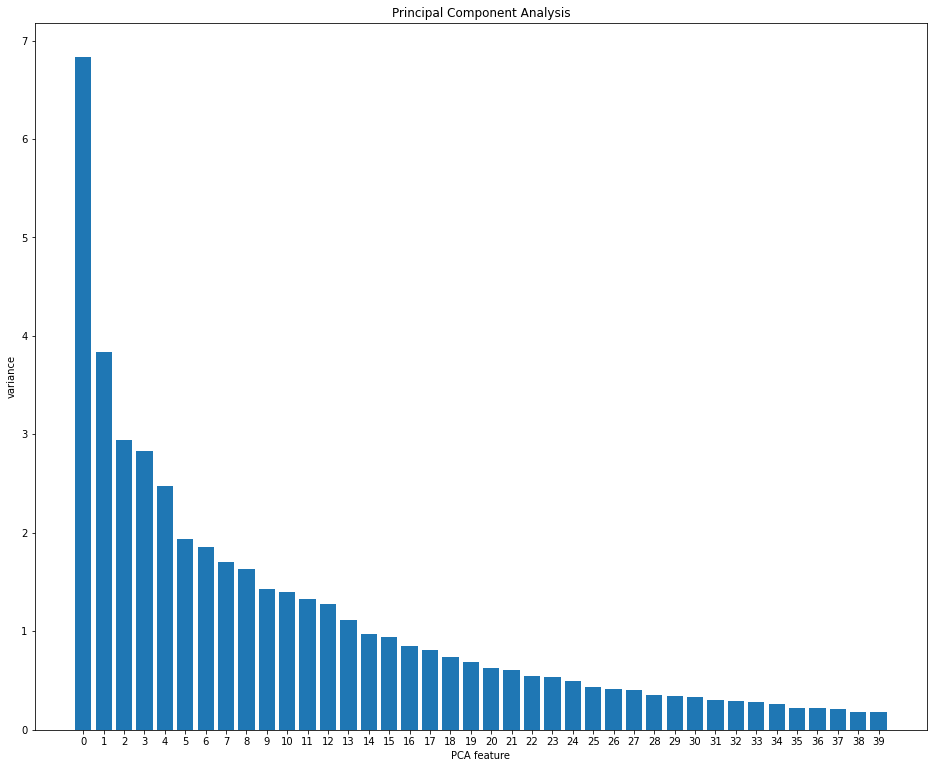

In [14]:
fig= plt.figure(figsize=(16,13))
features = range(pca_view.n_components_)
plt.bar(features, pca_view.explained_variance_)
plt.xticks(features)
plt.ylabel('variance')
plt.xlabel('PCA feature')
plt.title("Principal Component Analysis")
plt.show()

Using the 'Elbow technique' it appears there is a significant reduction in variance explained when going from 5 to 6 components.

In [15]:
pca = PCA(n_components = 5)
pca_X_train = pca.fit_transform(X_train)
pca_X_test = pca.transform(X_test)
pca_X_df = pd.DataFrame(pca_X_train)
print('Explained variation per component: {}'.format((pca.explained_variance_ratio_)))
print('Total Explained variation: {}'.format((pca.explained_variance_ratio_.sum())))

Explained variation per component: [0.14596018 0.08200333 0.06277542 0.0604428  0.05294877]
Total Explained variation: 0.40413049555051517


In [16]:
# Fit a AdaBoost model with PCA components = 5
clf = AdaBoostClassifier(n_estimators=100)
clf.fit(pca_X_train, y_train)
y_pred = clf.predict(pca_X_test)
print(accuracy_score(y_test, y_pred))
print('Confusion Matrix: ')
confusion_matrix (y_test, y_pred)

0.38862030494607663
Confusion Matrix: 


array([[   2,    1,    2,  453,    2],
       [   5,    1,    4,  387,    7],
       [   2,    1,    3,  369,    4],
       [   8,    3,    5, 1033,   10],
       [   3,    5,    2,  371,    6]], dtype=int64)

#### First 5 PCs explain about 40% of the variance with a 39% accuracy.

In [17]:
pca = PCA(n_components = 20)
pca_X_train = pca.fit_transform(X_train)
pca_X_test = pca.transform(X_test)
pca_X_df = pd.DataFrame(pca_X_train)
print('Explained variation per component: {}'.format((pca.explained_variance_ratio_)))
print('Total Explained variation: {}'.format((pca.explained_variance_ratio_.sum())))

Explained variation per component: [0.14596018 0.08200333 0.06277542 0.0604428  0.05294886 0.04143608
 0.03961754 0.03647532 0.03483842 0.03062684 0.02979907 0.028269
 0.02720788 0.02374564 0.02080158 0.02020324 0.01824489 0.01719945
 0.01580032 0.01473218]
Total Explained variation: 0.8031280403571072


In [18]:
# Fit a AdaBoost model with PCA components = 20
clf = AdaBoostClassifier(n_estimators=100)
clf.fit(pca_X_train, y_train)
y_pred = clf.predict(pca_X_test)
print(accuracy_score(y_test, y_pred))
print('Confusion Matrix: ')
confusion_matrix (y_test, y_pred)

0.3822982521383414
Confusion Matrix: 


array([[  6,   3,   7, 436,   8],
       [  6,  15,   4, 375,   4],
       [ 15,   6,   2, 349,   7],
       [ 29,  14,   8, 997,  11],
       [  7,   9,   3, 360,   8]], dtype=int64)

#### It takes 20 PCs to explain about 80% of the variance with no significant change in accuracy.

## Support Vector Machine One-vs-One

In [30]:
from sklearn import svm
import time

In [31]:
# fit PCA
pca = PCA(n_components = 5)
pca_X_train = pca.fit_transform(X_train)
pca_X_test = pca.transform(X_test)

In [32]:
# starting time
start = time.time()

#define grid for hypertuning
param_grid = {'C':[0.1, 1, 10, 100], 
              'gamma': [1, 0.1, 0.001, 0.0001], 
              'kernel': ['linear', 'rbf', 'sigmoid'],
              'decision_function_shape': ['ovo', 'ovr']}
grid = GridSearchCV(svm.SVC() , param_grid, refit=True, verbose=3)
grid.fit(pca_X_train, y_train)
print(grid.best_params_)
print(grid.best_estimator_)

end = time.time()
# total time taken
print(f"Runtime of this section is {end - start}")

In [ ]:
# starting time
start = time.time()

#define grid for hypertuning
param_grid = {'C':[0.1, 1, 10, 100], 
              'gamma': [1, 0.1, 0.001, 0.0001], 
              'kernel': ['poly'],
              'decision_function_shape': ['ovo', 'ovr']}
grid = GridSearchCV(svm.SVC() , param_grid, refit=True, verbose=3)
grid.fit(pca_X_train, y_train)
print(grid.best_params_)
print(grid.best_estimator_)

end = time.time()
# total time taken
print(f"Runtime of this section is {end - start}")

In [ ]:
# starting time
start = time.time()

#define grid for hypertuning
param_grid = {'C':[0.1, 1, 10, 100], 
              'gamma': [1, 0.1, 0.001, 0.0001], 
              'kernel': ['sigmoid'],
              'decision_function_shape': ['ovo', 'ovr']}
grid = GridSearchCV(svm.SVC() , param_grid, refit=True, verbose=3)
grid.fit(pca_X_train, y_train)
print(grid.best_params_)
print(grid.best_estimator_)

end = time.time()
# total time taken
print(f"Runtime of this section is {end - start}")

In [ ]:
linear = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo').fit(pca_X_train, y_train)
linear_pred = linear.predict(pca_X_test)
accuracy_lin = linear.score(pca_X_test, y_test)

In [ ]:
rbf = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo').fit(pca_X_train, y_train)
poly_pred = rbf.predict(pca_X_test)
accuracy_poly = rbf.score(pca_X_test, y_test)

In [ ]:
poly = svm.SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovo').fit(pca_X_train, y_train)
rbf_pred = poly.predict(pca_X_test)
accuracy_rbf = poly.score(pca_X_test, y_test)

In [ ]:
sig = svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovo').fit(pca_X_train, y_train)
sig_pred = sig.predict(pca_X_test)
accuracy_sig = sig.score(pca_X_test, y_test)

In [ ]:
print('Accuracy Linear Kernel: ', accuracy_lin)
print('Accuracy Polynomial Kernel: ', accuracy_poly)
print('Accuracy Radial Basis Kernel: ', accuracy_rbf)
print('Accuracy Sigmoid Kernel: ', accuracy_sig)

In [ ]:
cm_lin = confusion_matrix(y_test, linear_pred)
cm_poly = confusion_matrix(y_test, poly_pred)
cm_rbf = confusion_matrix(y_test, rbf_pred)
cm_sig = confusion_matrix(y_test, sig_pred)
print(cm_lin)
print(cm_poly)
print(cm_rbf)
print(cm_sig)

## Support Vector Machine One-vs-Rest

In [ ]:
linear = svm.SVC(kernel='linear', C=1, decision_function_shape='ovr').fit(pca_X_train, y_train)
linear_pred = linear.predict(pca_X_test)
accuracy_lin = linear.score(pca_X_test, y_test)

In [ ]:
rbf = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovr').fit(pca_X_train, y_train)
poly_pred = rbf.predict(pca_X_test)
accuracy_poly = rbf.score(pca_X_test, y_test)

In [ ]:
poly = svm.SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovr').fit(pca_X_train, y_train)
rbf_pred = poly.predict(pca_X_test)
accuracy_rbf = poly.score(pca_X_test, y_test)

In [ ]:
sig = svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovr').fit(pca_X_train, y_train)
sig_pred = sig.predict(pca_X_test)
accuracy_sig = sig.score(pca_X_test, y_test)

In [ ]:
print('Accuracy Linear Kernel: ', accuracy_lin)
print('Accuracy Polynomial Kernel: ', accuracy_poly)
print('Accuracy Radial Basis Kernel: ', accuracy_rbf)
print('Accuracy Sigmoid Kernel: ', accuracy_sig)

In [ ]:
cm_lin = confusion_matrix(y_test, linear_pred)
cm_poly = confusion_matrix(y_test, poly_pred)
cm_rbf = confusion_matrix(y_test, rbf_pred)
cm_sig = confusion_matrix(y_test, sig_pred)
print(cm_lin)
print(cm_poly)
print(cm_rbf)
print(cm_sig)